# Project Overview: Analyzing Customer Behavior and Market Trends in a UK-Based Online Retail Company

# Objective:
The objective of this project is to analyze customer behavior and market trends for a UK-based online retail company specializing in unique all-occasion gifts. Using a transactional dataset spanning from 01/12/2010 to 09/12/2011, the project aims to derive actionable insights to inform strategic decision-making and business growth.

# Dataset Information:

Transnational Dataset: Contains all transactions occurring within the specified timeframe.
Company Profile: The company primarily sells unique all-occasion gifts, with many customers being wholesalers.
# Columns:
1. InvoiceNo: A 6-digit integral number uniquely assigned to each transaction. If starting with letter 'c', it indicates a cancellation.
2. StockCode: A 5-digit integral number uniquely assigned to each distinct product.
3. Description: Product name.
4. Quantity: The quantities of each product per transaction.
5. InvoiceDate: The date and time when each transaction was generated.
6. UnitPrice: Product price per unit (in sterling).
7. CustomerID: A 5-digit integral number uniquely assigned to each customer.
8. Country: The name of the country where each customer resides.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans  
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import silhouette_score  
from scipy import stats  
from mlxtend.frequent_patterns import apriori, association_rules  

In [2]:
data = pd.read_csv("Online Retail.csv", encoding='latin1')



In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/10 8:26,3.39,17850.0,United Kingdom


In [4]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,9/12/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,9/12/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,9/12/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,9/12/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,9/12/11 12:50,4.95,12680.0,France


In [5]:
data.shape

(541909, 8)

In [6]:
# they are 541909 rows and 8 columns in this dataset 

# summary statistics

In [7]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
# Check for negative values
negative_values = data [data ['Quantity'] < 0]
print("Number of negative values in quanity ordered:", len(negative_values))


Number of negative values in quanity ordered: 10624


In [9]:
# Check for negative values
negative_values = data [data ['UnitPrice'] < 0]
print("Number of negative values in unit price :", len(negative_values))

Number of negative values in unit price : 2


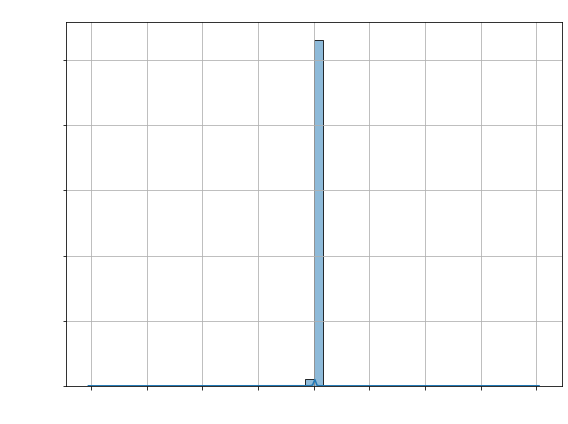

In [85]:
# Plot distribution of Quantity
plt.figure(figsize=(8, 6))
sns.histplot(data['Quantity'],bins=50, kde=True)
plt.ylabel('Frequency'
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
# Set tick parameters
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()
# Save the plot to a file
#plt.savefig('plot.png')



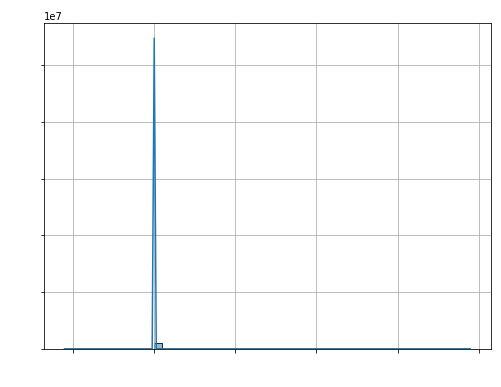

In [119]:
# Plot distribution of UnitPrice
# Increase figure size
plt.figure(figsize=(8, 6))
plt.grid(True)
sns.histplot(data['UnitPrice'], bins=50, kde=True)
plt.title('Distribution of UnitPrice',color = 'white')
plt.xlabel('UnitPrice',color='white')
plt.ylabel('Frequency',color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()
plt.show()

# Quantity:

The mean quantity of items purchased per transaction is around 9.55, with a standard deviation of approximately 218, This indicates a wide variation in the quantity of items purchased per transaction.

The minimum quantity is -80995, indicating product returns or cancellations, and the maximum quantity is 80995.
25% of the transactions involve quantities of 1 or less, while 75% involve quantities of 10 or less.

# UnitPrice:

The mean unit price of items is about £4.61, with a standard deviation of approximately £96.76,This suggests a wide range of prices for the items sold by the company.

The minimum unit price is £0, and the maximum unit price is £38970.
25% of the items have a unit price of £1.25 or less, while 75% have a unit price of £4.13 or less.

# Negative Values:
There are transactions with negative values in the Quantity column, which typically represent product returns or cancellations. These negative values are important to consider, as they affect revenue and can provide insights into customer behavior and satisfaction.

# CustomerID Insights:

The number of non-null values for CustomerID is lower (406,829) compared to the other columns (541,909). This indicates missing values in the CustomerID column

# Plots:
# Distribution of Quantity:

The histogram shows that most transactions involve smaller quantities, with a right-skewed distribution.
The peak around 0 indicates a significant number of transactions with negative quantities, likely representing returns or cancellations.
# Distribution of UnitPrice:

The histogram displays the distribution of unit prices, showing a right-skewed distribution with a peak around lower values.
There might be a few outliers with very high unit prices, as indicated by the long tail towards the higher prices.

In [12]:
print('Check if we had negative quantity ordered  and  unit prices at the same time in our table:',
     'No' if data[(data.Quantity<0) & (data.UnitPrice<0)].shape[0] == 0 else 'Yes', '\n')

Check if we had negative quantity ordered  and  unit prices at the same time in our table: No 



In [13]:
print('Check how many rows  we have where quantity is negative',
      'and unit prices is 0 or vice-versa:',
      data[(data.Quantity<=0) & (data.UnitPrice<=0)].shape[0])

Check how many rows  we have where quantity is negative and unit prices is 0 or vice-versa: 1336


In [14]:
print('\nWhat is the customer ID of the  the customer with either negative quantity ordered or nagative unit price :',
      data.loc[(data.Quantity<=0) & (data.UnitPrice<=0), 
                ['CustomerID']].CustomerID.unique())



What is the customer ID of the  the customer with either negative quantity ordered or nagative unit price : [nan]


based on the provided information,the  rows with negative values in both quantity and unit price do not have a corresponding Customer ID. This suggests that these rows may be incomplete or corrupted data entries, as they lack a crucial identifier (Customer ID) for associating the transaction with a specific customer. Therefore, when cleaning the data, i choose to remove  these rows separately considering the absence of a Customer ID.

# Data cleaning 

In [15]:
# Filter out transactions with negative quantities
data_clean = data[(data.Quantity > 0) & (data.UnitPrice > 0)]


In [16]:
data_clean.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
dtype: int64

In [17]:
data_clean = data_clean[~(data_clean.CustomerID.isnull())]

In [18]:
data_clean.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [19]:
# Convert InvoiceDate to datetime
data_clean['InvoiceDate'] = pd.to_datetime(data_clean['InvoiceDate'])

In [20]:
data_clean.describe()



,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


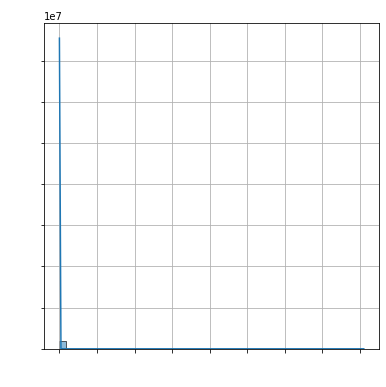

In [87]:
# Plot distribution of Quantity in the cleaned dataset
plt.figure(figsize=(6, 6))
plt.grid(True)
sns.histplot(data_clean['Quantity'], bins=50, kde=True)
plt.title('Distribution of Quantity (Cleaned)',color='white')
plt.xlabel('Quantity',color='white')
plt.ylabel('Frequency',color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

# Quantity:
The mean quantity of items purchased per transaction is approximately 12.99, with a standard deviation of around 179.33.
The minimum quantity is 1, indicating the lowest quantity of items purchased in a single transaction after removing negative quantities.
The maximum quantity is 80995, which remains unchanged from the original dataset.
25% of the transactions involve quantities of 2 or less, while 75% involve quantities of 12 or less.

# UnitPrice:
The mean unit price of items is roughly £3.12, with a standard deviation of approximately £22.10.
The minimum unit price is £0.001, indicating the lowest unit price of items after removing negative prices.
The maximum unit price is £8142.75, which remains unchanged from the original dataset.
25% of the items have a unit price of £1.25 or less, while 75% have a unit price of £3.75 or less.

# Distribution of Quantity:
The histogram displays the distribution of quantities in the cleaned dataset.
With negative quantities removed, the distribution appears to be more focused on positive values, as expected.
There might still be a few transactions with very high quantities, as indicated by the long tail towards higher quantities.

Overall, after filtering out transactions with negative quantities, the summary statistics and distribution of quantities remain largely similar, ensuring that no valid information is lost while addressing the issue of negative values in the dataset.

In [22]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [23]:
cat_des_df = data_clean.groupby(["StockCode","Description"]).count().reset_index()


In [24]:
cat_des_df

,StockCode,Description,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,10002,INFLATABLE POLITICAL GLOBE,49,49,49,49,49,49
1,10080,GROOVY CACTUS INFLATABLE,21,21,21,21,21,21
2,10120,DOGGY RUBBER,30,30,30,30,30,30
3,10123C,HEARTS WRAPPING TAPE,3,3,3,3,3,3
4,10124A,SPOTS ON RED BOOKCOVER TAPE,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...
3892,C2,CARRIAGE,133,133,133,133,133,133
3893,DOT,DOTCOM POSTAGE,16,16,16,16,16,16
3894,M,Manual,284,284,284,284,284,284
3895,PADS,PADS TO MATCH ALL CUSHIONS,3,3,3,3,3,3


In [25]:
duplicate_stockcodes = cat_des_df.StockCode.value_counts()[cat_des_df.StockCode.value_counts()>1].reset_index().head()


In [26]:
duplicate_stockcodes

,index,StockCode
0,23236,4
1,23196,4
2,23240,3
3,23209,3
4,23131,3


StockCode '23196' appears four times in this  dataset.
StockCode '23236' also appears four times.
StockCode '23244' appears three times.
StockCode '23126' appears three times.
StockCode '23396' appears three times.

In [27]:
specific_stockcode = '23236'
unique_descriptions = data_clean[data_clean['StockCode'] == specific_stockcode]['Description'].unique()
print(unique_descriptions)


['DOILEY STORAGE TIN' 'DOILEY BISCUIT TIN' 'STORAGE TIN VINTAGE DOILY '
 'STORAGE TIN VINTAGE DOILEY ']


In [28]:
specific_stockcode = '23196'
unique_descriptions = data_clean[data_clean['StockCode'] == specific_stockcode]['Description'].unique()
print(unique_descriptions)


['RETRO LEAVES MAGNETIC NOTEPAD' 'RETO LEAVES MAGNETIC SHOPPING LIST'
 'LEAVES MAGNETIC  SHOPPING LIST' 'VINTAGE LEAF MAGNETIC NOTEPAD']


In [29]:
specific_stockcode = '23244'
unique_descriptions = data_clean[data_clean['StockCode'] == specific_stockcode]['Description'].unique()
print(unique_descriptions)


['ROUND STORAGE TIN VINTAGE LEAF' 'STORAGE TIN VINTAGE LEAF'
 'CANNISTER VINTAGE LEAF DESIGN']


In [30]:
specific_stockcode = '23126'
unique_descriptions = data_clean[data_clean['StockCode'] == specific_stockcode]['Description'].unique()
print(unique_descriptions)


['DOLLCRAFT GIRL AMELIE KIT' 'FELTCRAFT GIRL AMELIE KIT'
 'DOLLCRAFT GIRL AMELIE']


In [31]:
specific_stockcode = '23396'
unique_descriptions = data_clean[data_clean['StockCode'] == specific_stockcode]['Description'].unique()
print(unique_descriptions)


['BUTTERFLY CUSHION COVER' 'LA JARDIN BOTANIQUE CUSHION COVER'
 'LE JARDIN BOTANIQUE CUSHION COVER']


WE CAN SEE THAT FOR SOME OF THIS STOCKS THEIR DUPLICAT OCCURENCE CAN BE AS A RESULT OF SPELLING ERROR , WHICH OBVIOUSLY AFFECTS THE QUALITY AND INTERGRITY OF THE DATA 

In [32]:
# Step 1: Find the mode description for each stock code
unique_desc = data_clean.groupby('StockCode')['Description'].agg(pd.Series.mode).reset_index()

#Check the unique_desc DataFrame
print(unique_desc.head())

  StockCode                  Description
0     10002  INFLATABLE POLITICAL GLOBE 
1     10080     GROOVY CACTUS INFLATABLE
2     10120                 DOGGY RUBBER
3    10123C        HEARTS WRAPPING TAPE 
4    10124A  SPOTS ON RED BOOKCOVER TAPE


In [33]:
# Step 2: Merge the original DataFrame with the mode description based on the stock code
data_clean = pd.merge(data_clean, unique_desc, on='StockCode', suffixes=('', '_Mode'))

In [34]:
data_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description_Mode
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
1,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 09:02:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
2,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 09:32:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
3,536390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2010-01-12 10:19:00,2.55,17511.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
4,536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2010-01-12 10:39:00,2.55,13408.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER


In [35]:
# Check a specific stock code to see if the mode description matches
stock_code = '23396'
data_clean[data_clean['StockCode'] == stock_code][['StockCode', 'Description', 'Description_Mode']].head()

,StockCode,Description,Description_Mode
382925,23396,BUTTERFLY CUSHION COVER,LE JARDIN BOTANIQUE CUSHION COVER
382926,23396,LA JARDIN BOTANIQUE CUSHION COVER,LE JARDIN BOTANIQUE CUSHION COVER
382927,23396,LA JARDIN BOTANIQUE CUSHION COVER,LE JARDIN BOTANIQUE CUSHION COVER
382928,23396,LA JARDIN BOTANIQUE CUSHION COVER,LE JARDIN BOTANIQUE CUSHION COVER
382929,23396,LA JARDIN BOTANIQUE CUSHION COVER,LE JARDIN BOTANIQUE CUSHION COVER


This data cleaning process involves identifying and resolving inconsistencies or discrepancies in the dataset. In this case, I  addressed the issue of multiple descriptions for the same stock code by standardizing them. that is ensuring each stock has the same description

In [36]:
data_clean['amount'] = data_clean.Quantity * data_clean.UnitPrice


In [37]:
data_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description_Mode,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,15.3
1,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 09:02:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,15.3
2,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 09:32:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,15.3
3,536390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2010-01-12 10:19:00,2.55,17511.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,163.2
4,536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2010-01-12 10:39:00,2.55,13408.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,81.6


In [38]:
data_clean.CustomerID = data_clean.CustomerID.astype('Int64')


In [39]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 397883
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         397884 non-null  object        
 1   StockCode         397884 non-null  object        
 2   Description       397884 non-null  object        
 3   Quantity          397884 non-null  int64         
 4   InvoiceDate       397884 non-null  datetime64[ns]
 5   UnitPrice         397884 non-null  float64       
 6   CustomerID        397884 non-null  Int64         
 7   Country           397884 non-null  object        
 8   Description_Mode  397884 non-null  object        
 9   amount            397884 non-null  float64       
dtypes: Int64(1), datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 33.8+ MB


In [40]:
# Exploratory Data analysis

# visualizing sales amounts across different countries and whether the United Kingdom is an internal (domestic) market or not.

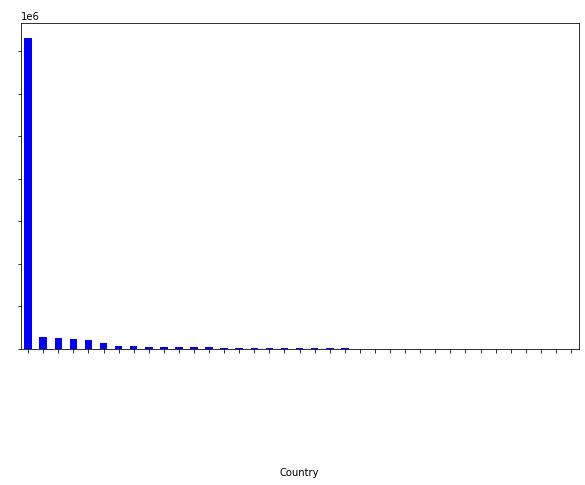

In [121]:
fig = plt.figure(figsize=(10, 6))
plt.grid(True)
plt.xticks(color='white')
plt.yticks(color='white')
plt.title('Amount sales by country', color ='white')
# Grouping and Plotting
g = data_clean.groupby(["Country"]).amount.sum().sort_values(ascending=False).plot(kind='bar', title='Amount Sales by Country', color ='blue')

# Adding a New Column
data_clean['Internal'] = data_clean.Country.apply(lambda x: 'Yes' if x=='United Kingdom' else 'No')


In [42]:
data_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description_Mode,amount,Internal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,15.3,Yes
1,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 09:02:00,2.55,17850,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,15.3,Yes
2,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 09:32:00,2.55,17850,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,15.3,Yes
3,536390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2010-01-12 10:19:00,2.55,17511,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,163.2,Yes
4,536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2010-01-12 10:39:00,2.55,13408,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,81.6,Yes


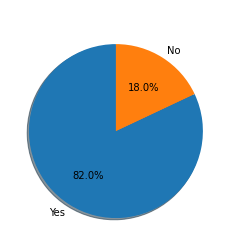

In [105]:
# f2 = fig.add_subplot(122)
# plt.grid(True)

# # Grouping by 'Internal' and Plotting a Pie Chart
# market = data_clean.groupby(["Internal"]).amount.sum().sort_values(ascending=False)
# g = plt.pie(market, labels=market.index, autopct='%1.1f%%', shadow=True, startangle=90,)

# # Adding Title
# plt.title('Internal Market',color ='white')

# # Displaying the Plot
# plt.show()


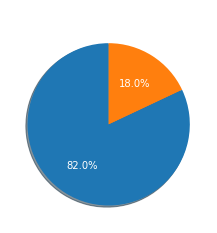

In [106]:
import matplotlib.pyplot as plt

# Setting up the figure and axis
f2 = plt.figure(figsize=(8, 6))
ax = f2.add_subplot(122)

# Grouping by 'Internal' and Plotting a Pie Chart
market = data_clean.groupby(["Internal"]).amount.sum().sort_values(ascending=False)

# Plotting the pie chart with white label colors
g = plt.pie(
    market, 
    labels=market.index, 
    autopct='%1.1f%%', 
    shadow=True, 
    startangle=90,
    textprops={'color': 'white'}  # Setting label text to white
)

# Adding Title with white color
plt.title('Internal Market', color='white')

# Enabling the grid for consistency (optional for a pie chart)
plt.grid(True)

# Displaying the Plot
plt.show()


Based on the sales amounts across different countries and the classification of the United Kingdom as an internal (domestic) market:

The analysis shows that the United Kingdom (UK) has the highest sales amount among all countries, indicating that it is a significant contributor to overall sales. This suggests that the UK market plays a crucial role in driving revenue for the business.

Additionally, the pie chart illustrates that approximately 82% of the total sales come from the internal market, which includes the United Kingdom. This indicates that the UK serves as a major internal (domestic) market for the business.

# sales amounts for the top 10 customers

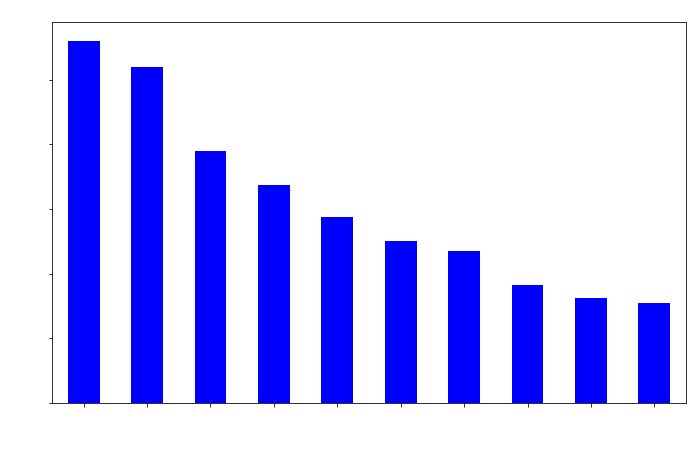

In [104]:
# Create a figure and subplot
fig = plt.figure(figsize=(25, 7))
f1 = fig.add_subplot(121)

# Calculate the percentage of total sales contributed by the top 10 customers
PercentSales =  np.round((data_clean.groupby(["CustomerID"]).amount.sum().\
                          sort_values(ascending=False)[:10].sum() / data_clean.groupby(["CustomerID"]).\
                          amount.sum().sort_values(ascending=False).sum()) * 100, 2)

# Plot the top 10 customers' sales amounts
g = data_clean.groupby(["CustomerID"]).amount.sum().sort_values(ascending=False)[:10]\
    .plot(kind='bar', title='Top 10 Customers: {:3.2f}% Sales Amount'.format(PercentSales),color = 'blue')
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel('CustomerID',color ='white')
plt.title('Top 10 cutomers : 17.26% sales Amount' , color = 'white')

# Show the plot
plt.show()


he top 10 customers contribute around 17.26% of the total sales amount, with customer 14646 being the highest contributor.

# What are the top 10 products based on sales amount, and what percentage of the total sales amount and total number of events (invoices) do they represent?

In [45]:
AmountSum = data_clean.groupby(["Description"]).amount.sum().sort_values(ascending=False)
Invoices = data_clean[["Description", "InvoiceNo"]].groupby(["Description"]).InvoiceNo.nunique().sort_values(ascending=False)



In [46]:
AmountSum.head(10)

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68844.33
ASSORTED COLOUR BIRD ORNAMENT          56580.34
Manual                                 53779.93
RABBIT NIGHT LIGHT                     51346.20
Name: amount, dtype: float64

In [47]:
Invoices.head(10)

Description
WHITE HANGING HEART T-LIGHT HOLDER    1971
REGENCY CAKESTAND 3 TIER              1703
JUMBO BAG RED RETROSPOT               1600
PARTY BUNTING                         1379
ASSORTED COLOUR BIRD ORNAMENT         1375
LUNCH BAG RED RETROSPOT               1288
SET OF 3 CAKE TINS PANTRY DESIGN      1146
POSTAGE                               1099
LUNCH BAG  BLACK SKULL.               1052
PACK OF 72 RETROSPOT CAKE CASES       1029
Name: InvoiceNo, dtype: int64

Text(0.5, 1.0, 'Top 10 Products in Sales Amount')

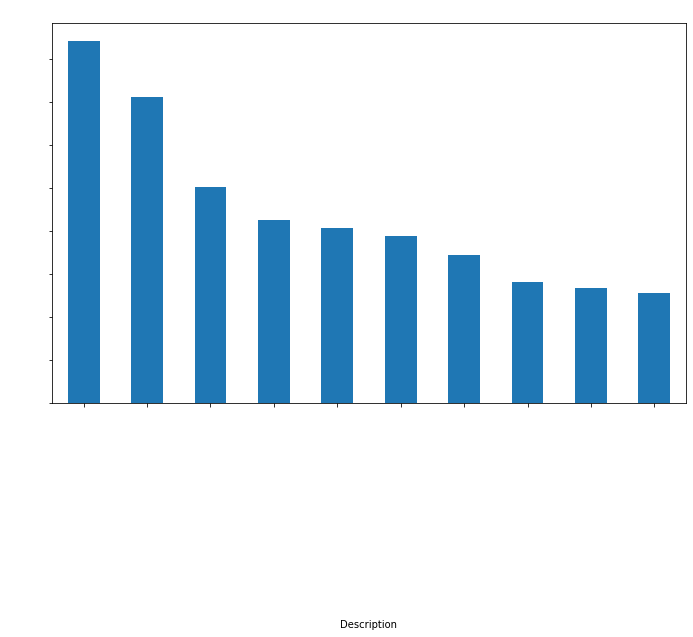

In [101]:
fig = plt.figure(figsize=(25, 7))
f1 = fig.add_subplot(121)
plt.grid(True)
Top10 = list(AmountSum[:10].index)
PercentSales = np.round((AmountSum[Top10].sum() / AmountSum.sum()) * 100, 2)
PercentEvents = np.round((Invoices[Top10].sum() / Invoices.sum()) * 100, 2)
g = AmountSum[Top10].plot(kind='bar', title='Top 10 Products in Sales Amount: {:3.2f}% of Amount and {:3.2f}% of Events'.format(PercentSales, PercentEvents))
plt.xticks(color='white')
plt.yticks(color='white')
plt.title('Top 10 Products in Sales Amount',color ='white')


The top 10 products based on sales amount are as follows:
1. PAPER CRAFT, LITTLE BIRDIE
2. REGENCY CAKESTAND 3 TIER
3. WHITE HANGING HEART T-LIGHT HOLDER
4. JUMBO BAG RED RETROSPOT
5. MEDIUM CERAMIC TOP STORAGE JAR
6. POSTAGE
7. PARTY BUNTING
8. ASSORTED COLOUR BIRD ORNAMENT
9. Manual
10. RABBIT NIGHT LIGHT
These top 10 products represent approximately 9.95% of the total sales amount and about 2.6% of the total number of events (invoices).








# customer segmentation

To calculate the RFM (Recency, Frequency, Monetary) values for customer segmentation , we need to consider the following steps:

1. Recency: Calculate how recent each customer's last purchase was.
2. Frequency: Count the number of purchases each customer made.
3. Monetary: Sum the total spend for each customer.

# Calculate Recency
our reference is the most recent date in the  dataset 

In [49]:
reference_date = data_clean['InvoiceDate'].max()


In [50]:
import datetime

In [51]:
refrence_date = data_clean.InvoiceDate.max() + datetime.timedelta(days = 1)
print('Reference Date:', refrence_date)


Reference Date: 2011-12-11 17:19:00


In [52]:
# Calculate days since last purchase
data_clean['days_since_last_purchase'] = (reference_date - data_clean['InvoiceDate']).astype('timedelta64[D]')


In [53]:
# Group by CustomerID and calculate recency
customer_recency_df = data_clean.groupby('CustomerID')['days_since_last_purchase'].min().reset_index()
customer_recency_df.rename(columns={'days_since_last_purchase': 'recency'}, inplace=True)

In [54]:
# Describe the recency data
customer_recency_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,4338.0,15300.408022,1721.808492,12346.0,13813.25,15299.5,16778.75,18287.0
recency,4338.0,105.470954,115.082161,0.0,22.00,61.0,161.75,697.0


1. Count: The number of unique customers (4339).
2. Mean: The average recency value (105.43 days).
3. Std: The standard deviation of recency values (115.08 days), indicating variability.
4. Min: The minimum recency value (0 days), indicating some customers made a purchase on the reference date.
5. 25% (Q1): The first quartile (22 days), meaning 25% of customers made their last purchase within 22 days.
6. 50% (Median): The median recency value (61 days), meaning half of the customers made their last purchase within 61 days.
7. 75% (Q3): The third quartile (161.5 days), meaning 75% of customers made their last purchase within 161.5 days.
8. Max: The maximum recency value (697 days), indicating the longest time since the last purchase for a customer.

In [55]:
from scipy.stats import norm, probplot


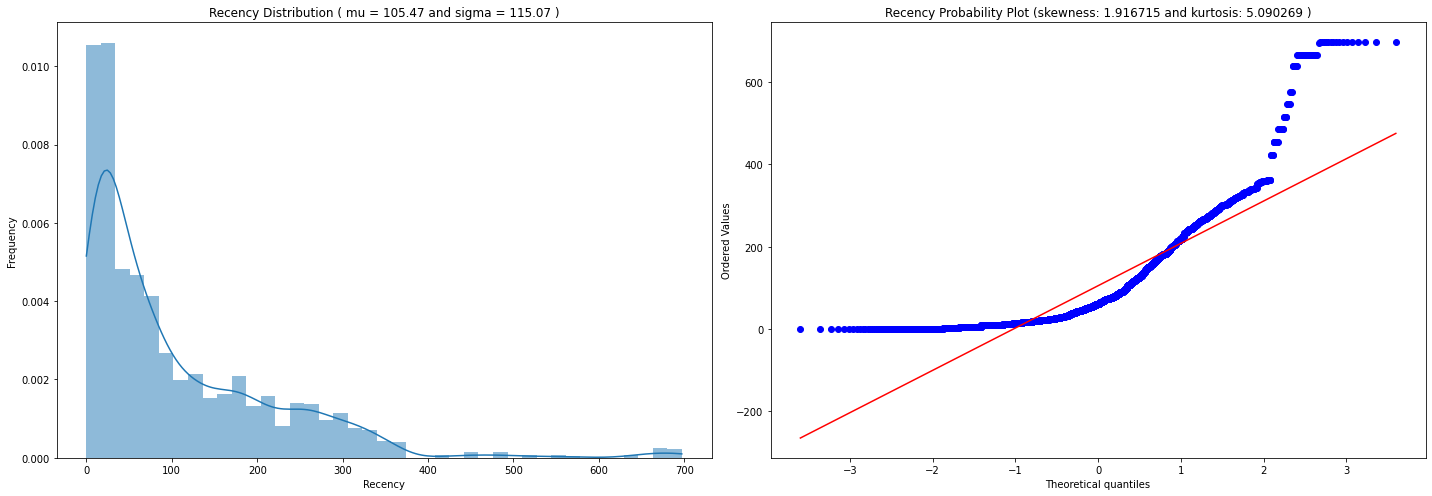

In [56]:
#Defines the function QQ_plot that takes in data (the dataset) and measure (a string describing the measure, e.g., 'Recency').
def QQ_plot(data, measure):
    fig = plt.figure(figsize=(20,7))
#Fits a normal distribution to the data and extracts the mean (mu) and standard deviation (sigma).
    (mu, sigma) = norm.fit(data)

    # Kernel Density plot
    fig1 = fig.add_subplot(121)
    sns.histplot(data, kde=True, stat="density", linewidth=0)
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Frequency')


    # QQ plot
    fig2 = fig.add_subplot(122)
    res = probplot(data, plot=fig2)
    fig2.set_title(measure + ' Probability Plot (skewness: {:.6f} and kurtosis: {:.6f} )'.format(data.skew(), data.kurt()), loc='center')

    plt.tight_layout()
    plt.show()

# Call the function with recency data
QQ_plot(customer_recency_df['recency'], 'Recency')

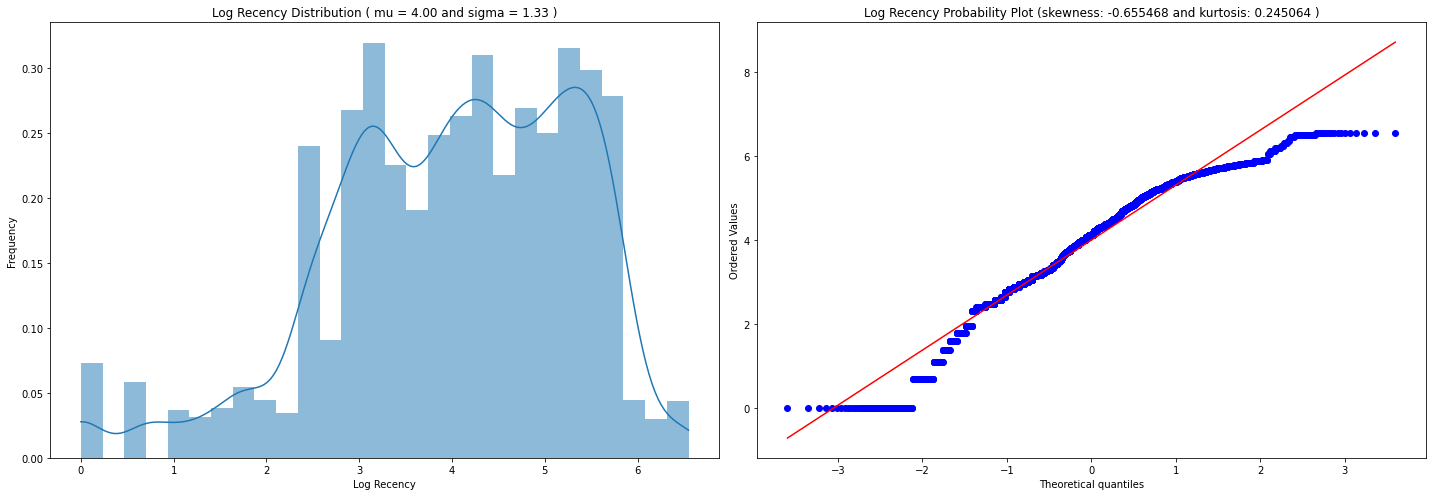

In [57]:
customer_recency_df['log_recency'] = np.log1p(customer_recency_df['recency'])
QQ_plot(customer_recency_df['log_recency'], 'Log Recency')


In [58]:
#Calculate Recency
data_clean_recency = data_clean.groupby('CustomerID')['InvoiceDate'].max().reset_index()
data_clean_recency.columns = ['CustomerID', 'LastPurchaseDate']
data_clean_recency['Recency'] = (reference_date - data_clean_recency['LastPurchaseDate']).dt.days


In [59]:
data_clean_recency.head()

,CustomerID,LastPurchaseDate,Recency
0,12346,2011-01-18 10:01:00,326
1,12347,2011-10-31 12:25:00,40
2,12348,2011-09-25 13:13:00,76
3,12349,2011-11-21 09:51:00,19
4,12350,2011-02-02 16:01:00,311


In [60]:
#data_clean_recency.tail()

# Calculate Frequency
Count the number of unique invoices per customer.

In [61]:
data_clean_frequency = data_clean.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
data_clean_frequency.columns = ['CustomerID', 'Frequency']


In [62]:
data_clean_frequency.head()

,CustomerID,Frequency
0,12346,1
1,12347,7
2,12348,4
3,12349,1
4,12350,1


# Calculate Monetary Value
Sum the total spend per customer.

In [63]:
data_clean['TotalAmount'] = data_clean['Quantity'] * data_clean['UnitPrice']
data_clean_monetary = data_clean.groupby('CustomerID')['TotalAmount'].sum().reset_index()
data_clean_monetary.columns = ['CustomerID', 'Monetary']


In [64]:
data_clean_monetary.head()

,CustomerID,Monetary
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


In [65]:
data_clean_monetary.tail()

,CustomerID,Monetary
4333,18280,180.60
4334,18281,80.82
4335,18282,178.05
4336,18283,2094.88
4337,18287,1837.28


# Merge R, F, M Values
Combine the Recency, Frequency, and Monetary dataframes into one.

In [66]:
rfm = data_clean_recency.merge(data_clean_frequency, on='CustomerID').merge(data_clean_monetary, on='CustomerID')


In [67]:
rfm

,CustomerID,LastPurchaseDate,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,326,1,77183.60
1,12347,2011-10-31 12:25:00,40,7,4310.00
2,12348,2011-09-25 13:13:00,76,4,1797.24
3,12349,2011-11-21 09:51:00,19,1,1757.55
4,12350,2011-02-02 16:01:00,311,1,334.40
...,...,...,...,...,...
4333,18280,2011-07-03 09:52:00,160,1,180.60
4334,18281,2011-12-06 10:53:00,4,1,80.82
4335,18282,2011-05-08 13:35:00,216,2,178.05
4336,18283,2011-11-30 12:59:00,10,16,2094.88


1. Recency:  lower scores means more recent purchases,and active customers.
2. Frequency: Higher frequency indicates loyal customers.
3. Monetary: Higher monetary values indicate high-spending customers.
we will  classify the customers into segments such as VIP, Loyal, At Risk,  using quantile method

Quantile analysis is a common and statistically sound method for segmenting customers based on RFM scores. Quantiles divide a dataset into equal portions, allowing you to identify thresholds that separate customers into different segments.
By using quantiles, you ensure that each segment contains approximately the same number of customers, which can help balance the distribution of customers across segments and provide more meaningful insights. 

In [68]:
# Assign scores using quantiles, ensuring to drop duplicates
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=False, duplicates='drop') + 1
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 5, labels=False, duplicates='drop') + 1
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=False, duplicates='drop') + 1



In [69]:
# Calculate RFM Score
rfm['RFM_Score'] = rfm['R_Score'] + rfm['F_Score'] + rfm['M_Score']


In [70]:
def segment_customer(data_clean):
    if data_clean['RFM_Score'] >= 13:
        return 'VIP'
    elif 9 <= data_clean['RFM_Score'] < 13:
        return 'Loyal'
    elif 5 <= data_clean['RFM_Score'] < 9:
        return 'At Risk'
    else:
        return 'Lost'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)


divided the customers into groups based on how recently they made a purchase (Recency), how often they make purchases (Frequency), and how much money they spend (Monetary).

We divided them into five equal groups, so each customer got a score from 1 to 5 for each of these three factors.

RFM Score Total Calculation:

Then, we added up these scores for each customer to get one total score, which tells us how good or active they are as customers. This total score could range from 3 to 15.

Segmentation:

Next, we wanted to put customers into different groups or segments based on their total score. We decided that customers with higher total scores are more valuable to us, so we set some cutoff points:

Those with scores of 13 or higher are VIP customers.

Scores between 9 and 12 are for loyal customers.

Scores between 5 and 8 mean they're at risk of leaving.

And scores below 5 mean they're lost or not very active customers.

In [71]:
rfm

,CustomerID,LastPurchaseDate,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,12346,2011-01-18 10:01:00,326,1,77183.60,5,1,5,11,Loyal
1,12347,2011-10-31 12:25:00,40,7,4310.00,2,4,5,11,Loyal
2,12348,2011-09-25 13:13:00,76,4,1797.24,3,3,4,10,Loyal
3,12349,2011-11-21 09:51:00,19,1,1757.55,2,1,4,7,At Risk
4,12350,2011-02-02 16:01:00,311,1,334.40,5,1,2,8,At Risk
...,...,...,...,...,...,...,...,...,...,...
4333,18280,2011-07-03 09:52:00,160,1,180.60,4,1,1,6,At Risk
4334,18281,2011-12-06 10:53:00,4,1,80.82,1,1,1,3,Lost
4335,18282,2011-05-08 13:35:00,216,2,178.05,5,1,1,7,At Risk
4336,18283,2011-11-30 12:59:00,10,16,2094.88,1,4,5,10,Loyal


VIP: Customers in the 'VIP' segment have high Recency, Frequency, and Monetary scores(rfm) . They are recent purchasers, buy frequently, and spend the most money. This segment is crucial as they are usually the  best customers.

Loyal: These customers have moderate to high scores across Recency, Frequency, and Monetary. They are frequent purchasers and spend a good amount but may not be as recent or spend as much as VIPs.

At Risk: Customers in this segment might have made frequent purchases and spent a lot in the past but haven't made recent purchases. They are at risk of churning and may require re-engagement strategies.

Lost: These customers have low scores in all RFM dimensions. They haven't purchased recently, don't buy often, and don't spend much. They may have already churned or need significant efforts to win back.

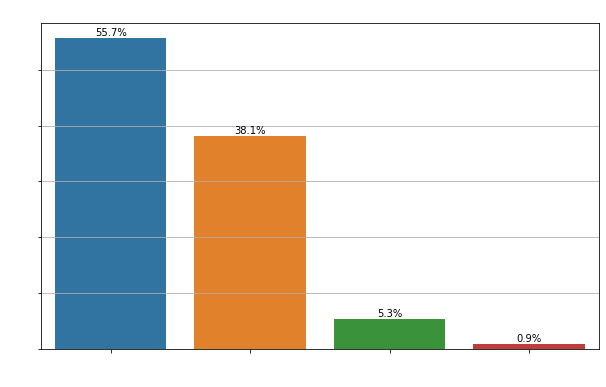

In [107]:
segment_counts = rfm['Segment'].value_counts(normalize=True).sort_values(ascending=False) * 100

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.grid(True)
sns.barplot(x=segment_counts.index, y=segment_counts.values)
plt.title('Customer Segments Distribution', color ='white')
plt.xlabel('Segments',color ='white')
plt.ylabel('Percentage of Customers (%)',color ='white')

# Add percentage labels on top of each bar
for i in range(len(segment_counts)):
    plt.text(i, segment_counts.values[i] + 0.5, f'{segment_counts.values[i]:.1f}%', ha='center')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()


The barplot results indicate the following distribution of customer segments:

1. 55.7% At Risk
2. 38.1% Loyal
3. 5.3% Lost
4. 0.9% VIP

# Key Insights:

1. High Proportion of At-Risk Customers (55.7%):

Implication: Over half of the  customers are at risk of churning. These customers have either decreased their purchasing frequency, haven't made recent purchases, or their spending has dropped.

Action: Focus on re-engagement strategies for this segment. Consider personalized marketing campaigns, special offers, or loyalty programs to encourage them to return and purchase more frequently.

2. Significant Loyal Segment (38.1%):

Implication: A substantial portion of the customers are loyal, indicating a stable and engaged customer base.

Action: Continue to nurture this segment. Provide rewards for their loyalty, exclusive deals, and ensure high customer satisfaction to maintain their engagement and prevent them from becoming at risk.

3. Small Lost Segment (5.3%):

Implication: A small percentage of customers have likely already churned. They haven't made recent purchases and may not be highly engaged.
Action: Analyze the reasons behind their churn. If viable, implement win-back campaigns with strong incentives to regain their business.

4. Minimal VIP Segment (0.9%):

Implication: Very few customers fall into the VIP category, indicating a potential area for growth.

Action: Identify characteristics of these VIP customers and try to replicate these traits in other segments. Consider premium offerings, VIP-exclusive benefits, and personalized experiences to grow this segment.

# The heatmap created shows the average Monetary value for each combination of Recency (R) and Frequency (F) scores. 


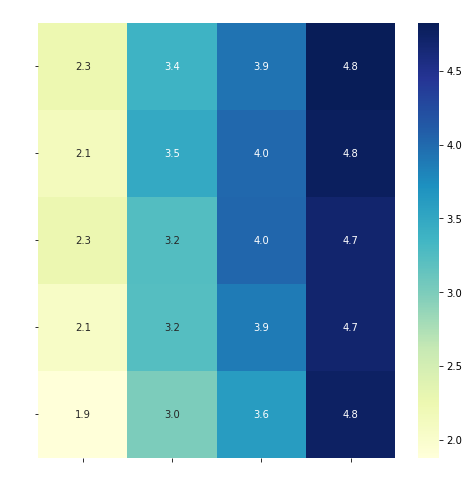

In [122]:
# Heatmap for R, F, M Scores
rfm_heatmap = rfm.pivot_table(index='R_Score', columns='F_Score', values='M_Score', aggfunc='mean')
plt.figure(figsize=(8, 8))
plt.grid(True)
sns.heatmap(rfm_heatmap, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('RFM Heatmap',color ='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel('R-score',color='white')
plt.ylabel('F-score', color='white')
plt.show()


# Color Gradient:

The color gradient ( from light to dark) indicates the average Monetary score, with darker shades typically representing higher average monetary values.


# Key Insights from Heatmap:

Top-Right Quadrant (High R and F Scores):

Observation: This area have  higher average Monetary values.
Implication: Customers who purchase frequently and recently spend the most. These are the  most valuable customers.
Action: Focus on retaining these customers with personalized experiences and premium services.


Bottom-Left Quadrant (Low R and F Scores):

Observation: This area  has lower average Monetary values.
Implication: Customers who purchase infrequently and haven't bought recently spend the least.
Action: Implement win-back strategies .

Middle Areas (Moderate R and F Scores):

Observation: These areas show moderate average Monetary values.
Implication: These customers are moderately engaged.
Action: Develop strategies to move these customers towards higher engagement and spending, potentially converting them to more loyal or even VIP customers.

In [74]:
# cluster method 

In [75]:
# Step 1: Standardize the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])


In [76]:
# Step 2: Determine the optimal number of clusters using the Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

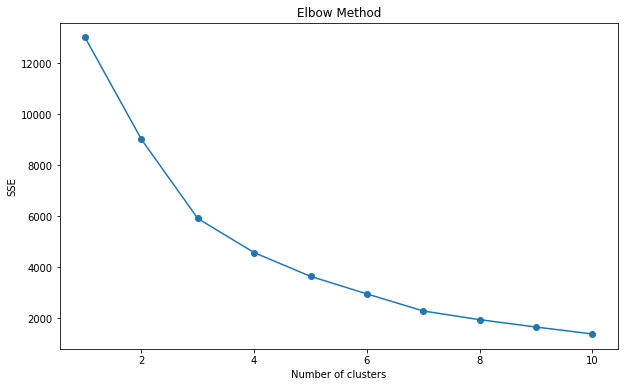

In [77]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [78]:
# Based on the Elbow plot, choose the optimal number of clusters (let's say 4 for this example)
optimal_clusters = 4

In [79]:
# Step 3: Apply K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [80]:
# Step 4: Interpret the clusters
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=['Recency', 'Frequency', 'Monetary'])
print(cluster_centers)

      Recency  Frequency       Monetary
0   17.124402  22.019139   12546.983206
1   13.615385  82.538462  127338.313846
2  267.569495   1.551444     498.987835
3   52.297207   3.702793    1356.652863


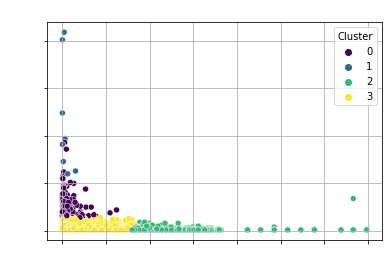

In [114]:
# Visualize the clusters
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue='Cluster', palette='viridis')
plt.title('Customer Segments',color ='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel('Recency',color='white')
plt.ylabel('Frequency',color='white')
plt.grid(True)
plt.show()

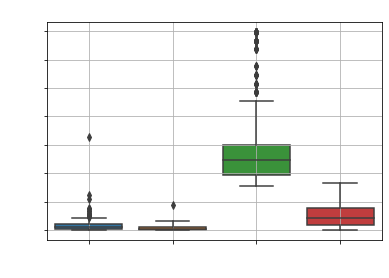

In [116]:
sns.boxplot(data=rfm, x='Cluster', y='Recency')
plt.title('Recency by Cluster',color ='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel('cluster', color='white')
plt.ylabel('recency',color='white')
plt.grid(True)
plt.show()


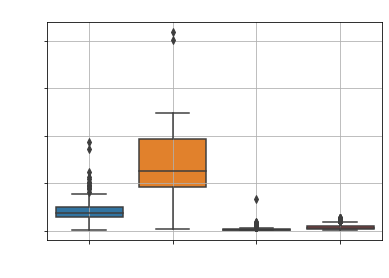

In [117]:
sns.boxplot(data=rfm, x='Cluster', y='Frequency')
plt.title('Frequency by Cluster',color = 'white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel('cluster', color='white')
plt.ylabel('frequency',color='white')
plt.grid(True)
plt.show()

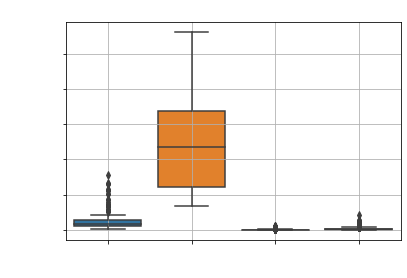

In [118]:
sns.boxplot(data=rfm, x='Cluster', y='Monetary')
plt.title('Monetary by Cluster',color = 'white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel('cluster', color='white')
plt.ylabel('monetary',color='white')
plt.grid(True)
plt.show()

Cluster Analysis
Cluster 0:

Recency: 17.12 days (recent activity)
Frequency: 22.02 purchases (moderately frequent)
Monetary: $12,546.98 (moderate spenders)
Interpretation: These customers have relatively recent activity and make purchases moderately often, with a decent spending amount. They could be considered potential loyal customers.
Cluster 1:

Recency: 52.26 days (not very recent)
Frequency: 3.70 purchases (low frequency)
Monetary: $1,356.20 (low spenders)
Interpretation: These customers have somewhat recent activity but do not purchase often and spend relatively little. They might be at risk of churning.
Cluster 2:

Recency: 267.57 days (very old activity)
Frequency: 1.55 purchases (very low frequency)
Monetary: $498.99 (very low spenders)
Interpretation: These customers have not made purchases in a long time, buy very infrequently, and spend very little. They are likely lost customers.
Cluster 3:

Recency: 13.62 days (very recent activity)
Frequency: 82.69 purchases (high frequency)
Monetary: $127,338.31 (very high spenders)
Interpretation: These customers have very recent activity, purchase very frequently, and spend a lot of money. They can be classified as VIP customers.
Key Insights and Recommendations
VIP Customers (Cluster 3):

These customers are highly engaged, make frequent purchases, and contribute significantly to revenue.
Strategy: Focus on retention strategies such as personalized offers, exclusive deals, and loyalty programs to maintain and enhance their loyalty.
Potential Loyal Customers (Cluster 0):

These customers are moderately engaged and spend a decent amount.
Strategy: Encourage them to become VIP customers by offering incentives for more frequent purchases and higher spending. Personalized recommendations and special promotions could be effective.
At-Risk Customers (Cluster 1):

These customers are not very engaged and spend relatively little.
Strategy: Re-engage them with targeted marketing campaigns, discounts, and reminders of the value they can get from your products or services. Understanding their needs and addressing any issues they might have can also help.
Lost Customers (Cluster 2):

These customers are likely to have churned.
Strategy: It might be challenging to re-engage these customers, but sending win-back campaigns with strong incentives or asking for feedback to understand why they stopped purchasing could provide some insights and potentially bring some back.